In [2]:
import pandas as pd
import sklearn.tree
import numpy as np
#import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
#from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

#import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold


#import xgboost as xgb


In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_N.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2,scale
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0,N0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0,N0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0,N0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0,N0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,27.385616,90.372531,0.000000,301.241772,27.385616,60.248354,16.431369,0.000000,657.254774,230.039171,...,5.477123,2.738562,0.000000,0.000000,0.000000,0.000000,2.738562,2.738562,0.0,NX
970,1.893234,1.262156,2.524312,8.835093,0.000000,8.835093,1.893234,1.262156,32.184980,1532.257472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX
971,6.297732,0.572521,0.572521,3.435127,0.572521,11.450422,4.007648,0.572521,1.717563,25.190929,...,0.000000,0.000000,0.000000,0.000000,1.145042,0.000000,0.000000,0.000000,0.0,NX
972,6.108815,0.000000,0.000000,82.468996,0.000000,21.380851,0.000000,18.326444,201.590879,3301.814245,...,0.000000,0.000000,3.054407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX


In [4]:
train_df=train_df.loc[(train_df['scale']!='NX')]

In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [8]:
caly_label_2=[]
for x in caly_label:
    if x=='N0':
        caly_label_2.append(0)
    elif x=='N1':
        caly_label_2.append(1)
    else:
        print("LOL",x)

In [9]:
caly_label_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
caly_label=caly_label_2

## Dobieranie parametrów part 1

In [11]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=[0,1],pos_label=1,greater_is_better=True)


In [12]:
param_grid = {

    'subsample':[0.5,1],
    'colsample_bytree':[0.5,1],
    'n_estimators':[100,500],
    'eta':[0.1,0.3,0.5,],
    'gamma':[0,5],
    'max_depth':[2, 6, 10], 
    'min_child_weight':[0.5,1,2],
    'max_delta_step':[1,5,10],
    
}

In [40]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 2, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
 

In [45]:
grid_search_2.best_score_#0.11579231045634207

0.5635994397759104

In [46]:
grid_search_2.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.6,
 'gamma': 0,
 'max_delta_step': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

## Dobieranie parametrów part 2

In [52]:
param_grid = {

    'subsample':[0.3,0.5,0.7], #
    'colsample_bytree':[0.3,0.5,0.7], ##
    'n_estimators':[100,200,300], ##
    'eta':[0.5,0.6,0.7], ##
    'gamma':[0,2,4], ##
    'max_depth':[2, 3, 4], 
    'min_child_weight':[1], ##
    'max_delta_step':[1,2,3] ##
    
}

In [53]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 2, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
 

In [54]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.6,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.600000024,
              max_delta_step=1, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2, nthread=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [57]:
grid_search_2.best_score_

0.5635994397759104

In [58]:
grid_search_2.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.6,
 'gamma': 0,
 'max_delta_step': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

## Dobieranie parametrów part 3

In [59]:
param_grid = {

    'subsample':[0.4,0.5,0.6], #
    'colsample_bytree':[0.4,0.5,0.6], ##
    'n_estimators':[100,200,300], ##
    'eta':[0.5,0.6,0,7], ##
    'gamma':[0,1], ##
    'max_depth':[2, 3], 
    'min_child_weight':[1], ##
    'max_delta_step':[1] ##
    
}

In [60]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 2, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
 

In [64]:
grid_search_2.best_score_

0.5635994397759104

In [65]:
grid_search_2.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.6,
 'gamma': 0,
 'max_delta_step': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

In [66]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.6,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.600000024,
              max_delta_step=1, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2, nthread=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

## Cross-walidacja

In [34]:
caly_label=np.array(caly_label)

In [67]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.6,
              eval_metric='logloss', gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.600000024,
              max_delta_step=1, max_depth=2, min_child_weight=1, 
              monotone_constraints='()', n_estimators=200, n_jobs=2, nthread=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
    
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=[0,1],pos_label=1)
    wart_2.append(blad)
    licznik+=1

In [68]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_N_XGB.csv')

In [3]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\N\\Klasa_N_XGB.csv')

In [69]:
wart_2

[0.6666666666666665,
 0.4285714285714285,
 0.588235294117647,
 0.5333333333333333,
 0.39999999999999997]

In [70]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.523361344537815

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [6]:
import seaborn as sns

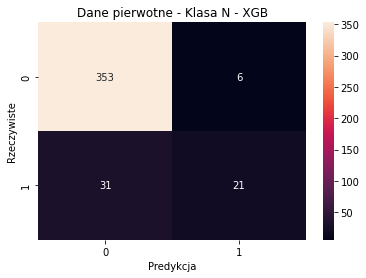

In [7]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa N - XGB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [75]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1)
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1)
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1, beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.404
Precision: 0.778
F1score: 0.532
